In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib.patches as mpatches
from matplotlib.pyplot import *
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import skew
from scipy.stats import kurtosis


In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,day_of_week,campaign,pdays,poutcome,cons_price_idx,cons_conf_idx,prime_rate,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,mon,1,999,nonexistent,93.994,-36.4,4.857,no
1,57,services,married,high.school,unknown,no,no,telephone,mon,1,999,nonexistent,93.994,-36.4,4.857,no
2,37,services,married,high.school,no,yes,no,telephone,mon,1,999,nonexistent,93.994,-36.4,4.857,no
3,40,admin.,married,basic.6y,no,no,no,telephone,mon,1,999,nonexistent,93.994,-36.4,4.857,no
4,56,services,married,high.school,no,no,yes,telephone,mon,1,999,nonexistent,93.994,-36.4,4.857,no


# Data Cleaning

In [4]:
## No missing values
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
day_of_week       0
campaign          0
pdays             0
poutcome          0
cons_price_idx    0
cons_conf_idx     0
prime_rate        0
y                 0
dtype: int64

In [23]:
##Group “basic.4y”, “basic.9y” , “basic.6y” and 'illiterate' together and call them “basic”.
df['education']=np.where(df['education'] =='basic.9y', 'Basic', df['education'])
df['education']=np.where(df['education'] =='basic.6y', 'Basic', df['education'])
df['education']=np.where(df['education'] =='basic.4y', 'Basic', df['education'])
df['education']=np.where(df['education'] =='illiterate', 'Basic', df['education'])

## Change the values that future.data doesn't have 
## 80 unkown in marital, change unknown to married
df['marital']=np.where(df['marital'] =='unknown', 'married', df['marital'])
## 3 yes in default, change yes to unknown
df['default']=np.where(df['default'] =='yes', 'unknown', df['default'])

In [24]:
## Need to be scaled
print 'skew for campaign is ' + str(skew(df['campaign']))
print 'kurtosis for campaign is ' + str(kurtosis(df['campaign']))

print 'skew for campaign is ' + str(skew(df['age']))
print 'kurtosis for campaign is ' + str(kurtosis(df['age']))

print 'skew for campaign is ' + str(skew(df['pdays']))
print 'kurtosis for campaign is ' + str(kurtosis(df['pdays']))

print 'skew for campaign is ' + str(skew(df['cons_price_idx']))
print 'kurtosis for campaign is ' + str(kurtosis(df['cons_price_idx']))

skew for campaign is 4.72250067299
kurtosis for campaign is 36.2303789482
skew for campaign is 0.76537155368
kurtosis for campaign is 0.728992485876
skew for campaign is -5.06924249443
kurtosis for campaign is 23.6976796896
skew for campaign is -0.236619811859
kurtosis for campaign is -0.823950164996


### Option 1: change all categorical variables to numerical levels


In [25]:
jobs ={f:i for i, f in enumerate(df["job"].unique())}
jobs
maritals ={f:i for i, f in enumerate(df["marital"].unique())}
maritals
education ={f:i for i, f in enumerate(df["education"].unique())}
education
default ={f:i for i, f in enumerate(df["default"].unique())}
default
housing ={f:i for i, f in enumerate(df["housing"].unique())}
housing
loan ={f:i for i, f in enumerate(df["loan"].unique())}
loan
contacts ={f:i for i, f in enumerate(df["contact"].unique())}
contacts
day_of_week ={f:i for i, f in enumerate(df["day_of_week"].unique())}
day_of_week
poutcomes ={f:i for i, f in enumerate(df["poutcome"].unique())}
poutcomes
y ={f:i for i, f in enumerate(df["y"].unique())}
y
df1 = df.replace({"job": jobs, "marital": maritals, "education": education, "default": default, "housing": housing, "loan": loan, "contact": contacts, "day_of_week": day_of_week, "poutcome": poutcomes, "y": y, })
df1.head(10)

,age,job,marital,education,default,housing,loan,contact,day_of_week,campaign,pdays,poutcome,cons_price_idx,cons_conf_idx,prime_rate,y
0,56,0,0,0,0,0,0,0,0,1,999,0,93.994,-36.4,4.857,0
1,57,1,0,1,1,0,0,0,0,1,999,0,93.994,-36.4,4.857,0
2,37,1,0,1,0,1,0,0,0,1,999,0,93.994,-36.4,4.857,0
3,40,2,0,0,0,0,0,0,0,1,999,0,93.994,-36.4,4.857,0
4,56,1,0,1,0,0,1,0,0,1,999,0,93.994,-36.4,4.857,0
5,45,1,0,0,1,0,0,0,0,1,999,0,93.994,-36.4,4.857,0
6,59,2,0,2,0,0,0,0,0,1,999,0,93.994,-36.4,4.857,0
7,41,3,0,3,1,0,0,0,0,1,999,0,93.994,-36.4,4.857,0
8,24,4,1,2,0,1,0,0,0,1,999,0,93.994,-36.4,4.857,0
9,25,1,1,1,0,1,0,0,0,1,999,0,93.994,-36.4,4.857,0


In [26]:
## Scale
mms = MinMaxScaler()
df1[:] = mms.fit_transform(df1[:])
df1.head()

,age,job,marital,education,default,housing,loan,contact,day_of_week,campaign,pdays,poutcome,cons_price_idx,cons_conf_idx,prime_rate,y
0,0.481481,0.000000,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.698753,0.60251,0.957379,0.0
1,0.493827,0.090909,0.0,0.25,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.698753,0.60251,0.957379,0.0
2,0.246914,0.090909,0.0,0.25,0.0,0.5,0.0,0.0,0.0,0.0,1.0,0.0,0.698753,0.60251,0.957379,0.0
3,0.283951,0.181818,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.698753,0.60251,0.957379,0.0
4,0.481481,0.090909,0.0,0.25,0.0,0.0,0.5,0.0,0.0,0.0,1.0,0.0,0.698753,0.60251,0.957379,0.0


### Option 2: change all categorical variables to dummy variables



In [27]:
df_dummy = pd.get_dummies(df, columns = ["housing","job", "marital", "education", "default", "loan","contact","day_of_week","poutcome"], drop_first=False)
df_dummy.loc[df_dummy['y'] == 'no', 'if_subscribe'] = 0
df_dummy.loc[df_dummy['y'] == 'yes', 'if_subscribe'] = 1
df_dummy = df_dummy.drop(['y'],axis=1)
df_dummy.shape

(40181, 45)

In [28]:
mms = MinMaxScaler()
df_dummy[:] = mms.fit_transform(df_dummy[:])
df_dummy.head()

,age,campaign,pdays,cons_price_idx,cons_conf_idx,prime_rate,housing_no,housing_unknown,housing_yes,job_admin.,...,contact_telephone,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,if_subscribe
0,0.481481,0.0,1.0,0.698753,0.60251,0.957379,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.493827,0.0,1.0,0.698753,0.60251,0.957379,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.246914,0.0,1.0,0.698753,0.60251,0.957379,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.283951,0.0,1.0,0.698753,0.60251,0.957379,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.481481,0.0,1.0,0.698753,0.60251,0.957379,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### import future data 

In [29]:
future = pd.read_csv('futures.csv')

In [30]:
#group “basic.4y”, “basic.9y” and “basic.6y” together and call them “basic”.
future['education']=np.where(future['education'] =='basic.9y', 'Basic', future['education'])
future['education']=np.where(future['education'] =='basic.6y', 'Basic', future['education'])
future['education']=np.where(future['education'] =='basic.4y', 'Basic', future['education'])
future['education']=np.where(future['education'] =='illiterate', 'Basic', future['education'])

### option 1

In [31]:
jobs ={f:i for i, f in enumerate(future["job"].unique())}
jobs
maritals ={f:i for i, f in enumerate(future["marital"].unique())}
maritals
education ={f:i for i, f in enumerate(future["education"].unique())}
education
default ={f:i for i, f in enumerate(future["default"].unique())}
default
housing ={f:i for i, f in enumerate(future["housing"].unique())}
housing
loan ={f:i for i, f in enumerate(future["loan"].unique())}
loan
contacts ={f:i for i, f in enumerate(future["contact"].unique())}
contacts
day_of_week ={f:i for i, f in enumerate(future["day_of_week"].unique())}
day_of_week
poutcomes ={f:i for i, f in enumerate(future["poutcome"].unique())}
poutcomes
future1 = future.replace({"job": jobs, "marital": maritals, "education": education, "default": default, "housing": housing, "loan": loan, "contact": contacts, "day_of_week": day_of_week, "poutcome": poutcomes})
future1.head()

,age,job,marital,education,default,housing,loan,contact,day_of_week,campaign,pdays,poutcome,cons_price_idx,cons_conf_idx,prime_rate
0,42,0,0,0,0,0,0,0,0,1,999,0,93.994,-36.4,4.857
1,41,1,0,0,1,0,0,0,0,2,999,0,93.994,-36.4,4.857
2,34,2,0,1,1,0,0,0,0,1,999,0,93.994,-36.4,4.857
3,54,3,0,1,0,0,0,0,0,1,999,0,93.994,-36.4,4.857
4,48,0,0,0,1,1,0,0,0,1,999,0,93.994,-36.4,4.857


### option 2

In [32]:
future_dummy = pd.get_dummies(future, columns = ["housing","job", "marital", "education", "default", "loan","contact","day_of_week","poutcome"], drop_first=False)
future_dummy.shape

(1007, 44)

# Analytic Visualization

In [33]:
x = df.groupby('y')['job'].count().reset_index()
x.groupby('job')['y'].sum()

job
4116     yes
36065     no
Name: y, dtype: object

In [34]:
df.groupby('y').mean()
df.groupby('job').mean()

,age,campaign,pdays,cons_price_idx,cons_conf_idx,prime_rate
job,,,,,,
admin.,38.207220,2.628662,956.600651,93.537324,-40.234313,3.573719
blue-collar,39.560693,2.562459,985.634518,93.658510,-41.371485,3.778752
entrepreneur,41.765898,2.549266,980.957372,93.605545,-41.298812,3.789909
housemaid,45.357488,2.646377,965.406763,93.681666,-39.510338,4.049365
management,42.391963,2.478322,965.735284,93.526402,-40.513430,3.632006
retired,61.747731,2.489413,906.455535,93.433008,-38.619540,2.819178
self-employed,39.977617,2.667870,977.475812,93.561388,-40.461011,3.695225
services,37.919897,2.594095,980.379974,93.635795,-41.288755,3.709312
student,25.907692,2.121893,846.333728,93.326331,-40.179172,1.897882


### Original Numerical Distplot 

/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'cons_price_idx Distribution')

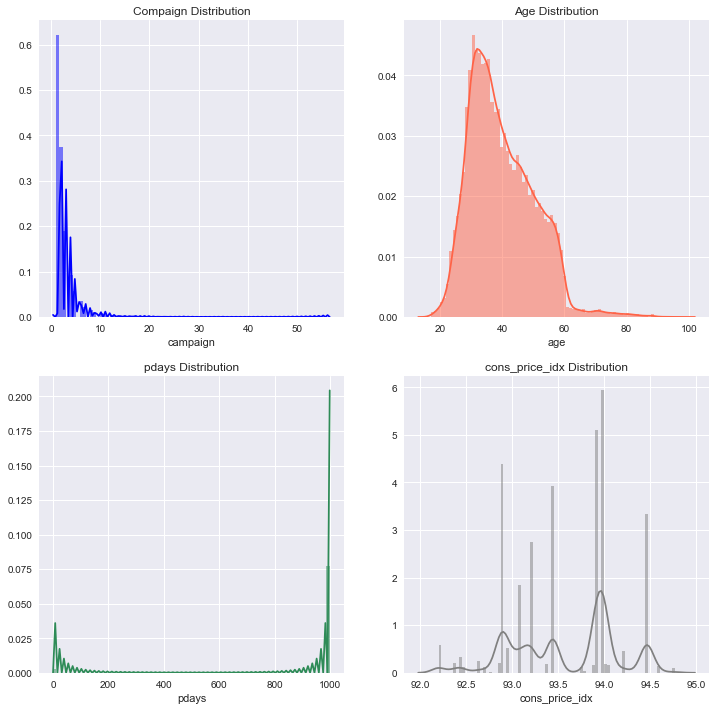

In [35]:
plt.figure(figsize=(12,12))
ax=plt.subplot(221)
sns.distplot(df['campaign'],bins=80,hist=True,color="blue",hist_kws={'alpha':0.5})
sns.plt.title("Compaign Distribution")

ax=plt.subplot(222)
sns.set(font_scale=1)
sns.distplot(df['age'],bins=80,color="tomato",hist=True,hist_kws={'alpha':0.5})
sns.plt.title("Age Distribution")


ax=plt.subplot(223)
sns.set(font_scale=1)
sns.distplot(df['pdays'],bins=80,color="seagreen",hist=True,hist_kws={'alpha':0.5})
sns.plt.title("pdays Distribution")


ax=plt.subplot(224)
sns.set(font_scale=1)
sns.distplot(df['cons_price_idx'],bins=80,color="grey",hist=True,hist_kws={'alpha':0.5})
sns.plt.title("cons_price_idx Distribution")

### Scale all the numerical variables to range(0,1)

In [36]:


mms = MinMaxScaler()

df_scale = df.copy()
df_scale[['age','campaign','pdays','cons_price_idx','cons_conf_idx','prime_rate']] = mms.fit_transform(df_scale[['age','campaign','pdays','cons_price_idx','cons_conf_idx','prime_rate']])
df_scale.head()

,age,job,marital,education,default,housing,loan,contact,day_of_week,campaign,pdays,poutcome,cons_price_idx,cons_conf_idx,prime_rate,y
0,0.481481,housemaid,married,Basic,no,no,no,telephone,mon,0.0,1.0,nonexistent,0.698753,0.60251,0.957379,no
1,0.493827,services,married,high.school,unknown,no,no,telephone,mon,0.0,1.0,nonexistent,0.698753,0.60251,0.957379,no
2,0.246914,services,married,high.school,no,yes,no,telephone,mon,0.0,1.0,nonexistent,0.698753,0.60251,0.957379,no
3,0.283951,admin.,married,Basic,no,no,no,telephone,mon,0.0,1.0,nonexistent,0.698753,0.60251,0.957379,no
4,0.481481,services,married,high.school,no,no,yes,telephone,mon,0.0,1.0,nonexistent,0.698753,0.60251,0.957379,no


### Numerical variables distplot after Scaling

/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'cons_price_idx Distribution')

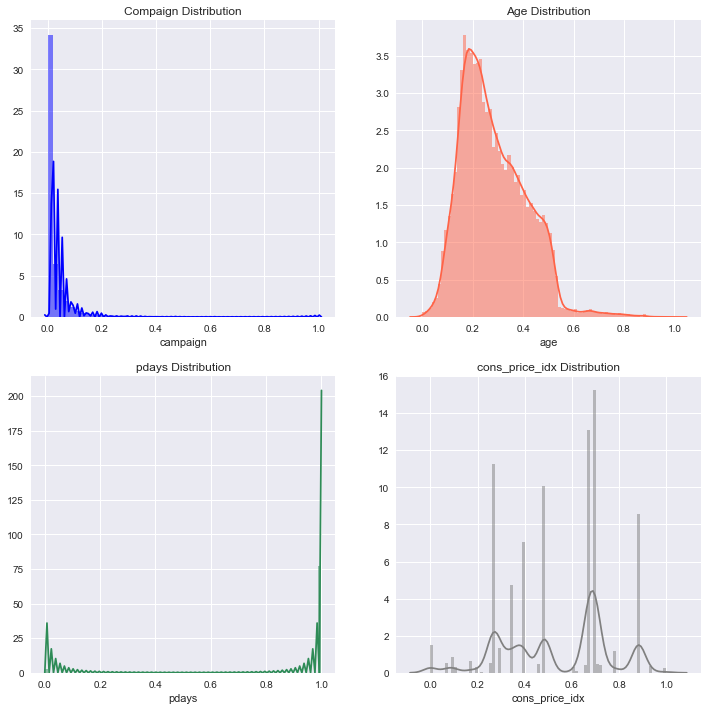

In [37]:
plt.figure(figsize=(12,12))
ax=plt.subplot(221)
sns.distplot(df_scale['campaign'],bins=50,hist=True,color="blue",hist_kws={'alpha':0.5})
sns.plt.title("Compaign Distribution")

ax=plt.subplot(222)
sns.set(font_scale=1)
sns.distplot(df_scale['age'],bins=80,color="tomato",hist=True,hist_kws={'alpha':0.5})
sns.plt.title("Age Distribution")


ax=plt.subplot(223)
sns.set(font_scale=1)
sns.distplot(df_scale['pdays'],bins=80,color="seagreen",hist=True,hist_kws={'alpha':0.5})
sns.plt.title("pdays Distribution")


ax=plt.subplot(224)
sns.set(font_scale=1)
sns.distplot(df_scale['cons_price_idx'],bins=80,color="grey",hist=True,hist_kws={'alpha':0.5})
sns.plt.title("cons_price_idx Distribution")

### relationship between Previous Outcome and y

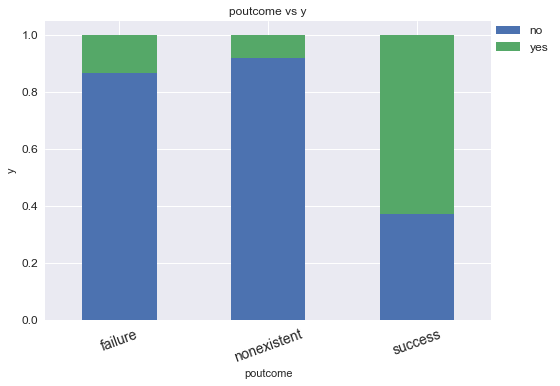

In [38]:
table=pd.crosstab(df.poutcome,df.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('poutcome vs y')
plt.xlabel('poutcome')
plt.ylabel('y')
plt.xticks(fontsize=14, rotation=20)
plt.yticks(fontsize=12)
legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0,fontsize=12)




### Relationship between Categorical Variables

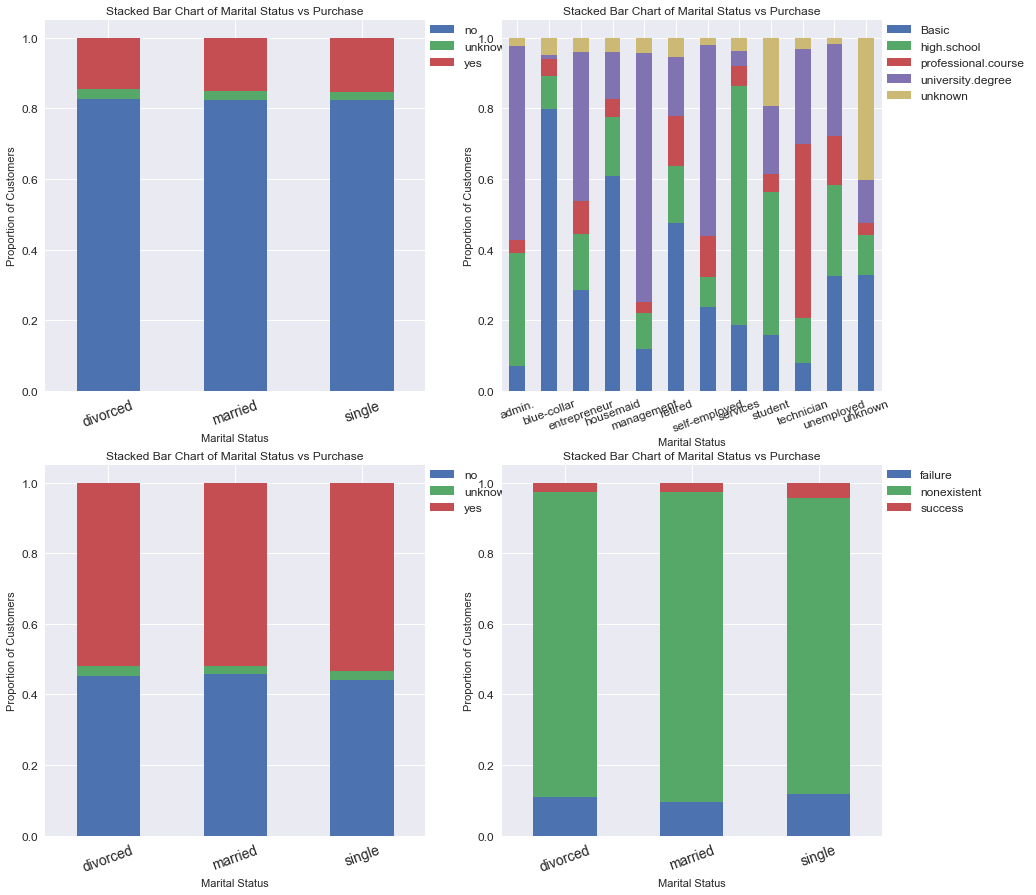

In [39]:

plt.figure(figsize=(15,15))
ax=plt.subplot(221)
table=pd.crosstab(df.marital,df.loan)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True,ax=ax)
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')
plt.xticks(fontsize=14, rotation=20)
plt.yticks(fontsize=12)
legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0,fontsize=12)

#----------------------------------------

ax=plt.subplot(222)
table=pd.crosstab(df.job,df.education)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True,ax=ax)
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')
plt.xticks(fontsize=12, rotation=20)
plt.yticks(fontsize=12)
legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0,fontsize=12)

#----------------------------------------

ax=plt.subplot(223)
table=pd.crosstab(df.marital,df.housing)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True,ax=ax)
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')
plt.xticks(fontsize=14, rotation=20)
plt.yticks(fontsize=12)
legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0,fontsize=12)

#----------------------------------------

ax=plt.subplot(224)
table=pd.crosstab(df.marital,df.poutcome)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True,ax=ax)
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')
plt.xticks(fontsize=14, rotation=20)
plt.yticks(fontsize=12)
legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0,fontsize=12)




### Relationship between Categorical Variables and y

/anaconda/lib/python2.7/site-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


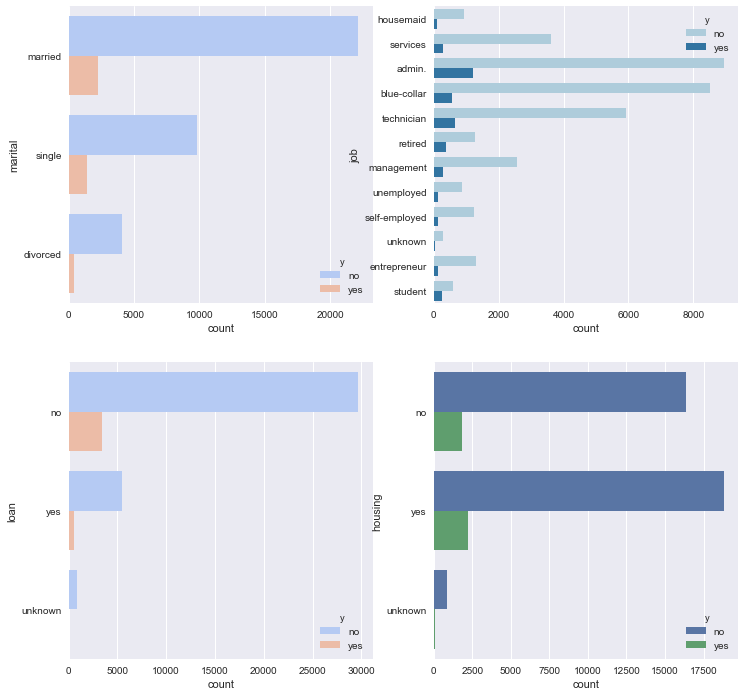

In [40]:
plt.figure(figsize=(12,12))
ax=plt.subplot(221)
sns.set_style("darkgrid")
sns.countplot(y="marital", hue="y", data=df,ax=ax, palette = 'coolwarm')

ax=plt.subplot(222)
sns.set_style("darkgrid")
sns.countplot(y="job", hue="y", data=df,ax=ax,palette = 'Paired')

ax=plt.subplot(223)
sns.countplot(y="loan", hue="y", data=df,ax=ax, palette = 'coolwarm')

ax=plt.subplot(224)
sns.countplot(y="housing", hue="y", data=df,ax=ax)




### Pie Plot of Categorical Variables

Text(0.5,1,'% of housing')

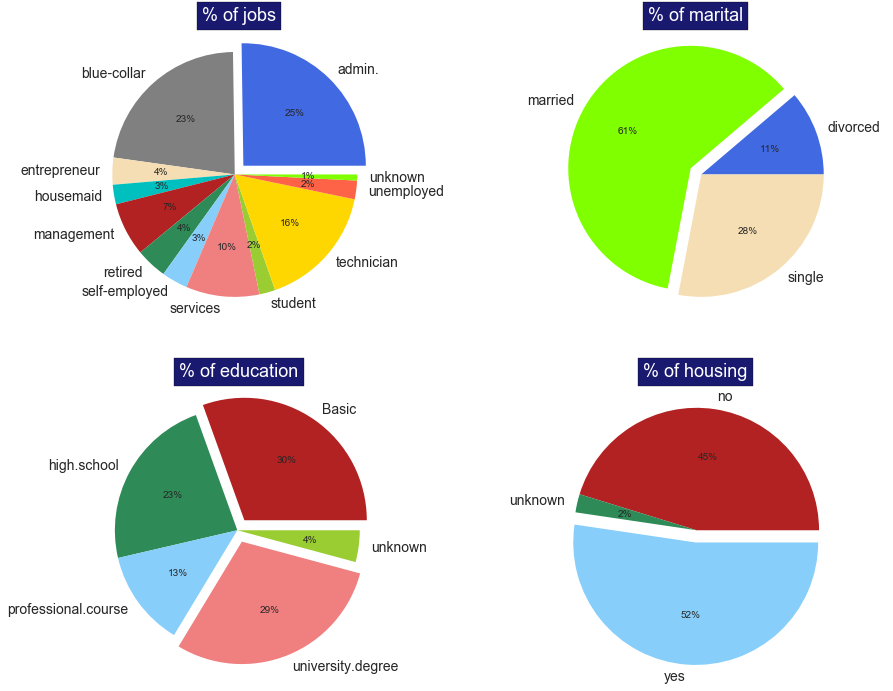

In [53]:
f,axes = plt.subplots(2, 2, sharey=True,figsize=(15,12))
colors = ['royalblue', 'grey', 'wheat', 'c', 'firebrick', 'seagreen', 'lightskyblue',
          'lightcoral', 'yellowgreen', 'gold', 'tomato', 'chartreuse']
labels = df.groupby('job').size().index
sizes  = df.groupby('job').size()
explode = [0.1 if sizes[i] > 10000 else 0.0 for i in range(12)]
patches, texts, autotexts = axes[0,0].pie(sizes, explode = explode,
                                labels=labels, colors = colors,  autopct='%1.0f%%',
                                shadow=False, startangle=0)
for i in range(12): 
    texts[i].set_fontsize(14)
axes[0,0].axis('equal')
axes[0,0].set_title('% of jobs', bbox={'facecolor':'midnightblue', 'pad':5},
              color = 'w',fontsize=18)


#----------------------------------------

colors = ['royalblue', 'chartreuse', 'wheat']
labels = df.groupby('marital').size().index
sizes  = df.groupby('marital').size()
explode = [0.1 if sizes[i] > 20000 else 0.0 for i in range(3)]
patches, texts, autotexts = axes[0,1].pie(sizes, explode = explode,
                                labels=labels, colors = colors,  autopct='%1.0f%%',
                                shadow=False, startangle=0)
for i in range(3): 
    texts[i].set_fontsize(14)
axes[0,1].axis('equal')
axes[0,1].set_title('% of marital', bbox={'facecolor':'midnightblue', 'pad':5},
              color = 'w',fontsize=18)

    
#----------------------------------------

colors = ['firebrick', 'seagreen', 'lightskyblue',
          'lightcoral', 'yellowgreen', 'gold', 'tomato']
labels = df.groupby('education').size().index
sizes  = df.groupby('education').size()
explode = [0.1 if sizes[i] > 10000 else 0.0 for i in range(5)]
patches, texts, autotexts = axes[1,0].pie(sizes, explode = explode,
                                labels=labels, colors = colors,  autopct='%1.0f%%',
                                shadow=False, startangle=0)
for i in range(5): 
    texts[i].set_fontsize(14)
axes[1,0].axis('equal')
axes[1,0].set_title('% of education', bbox={'facecolor':'midnightblue', 'pad':5},
              color = 'w',fontsize=18)

    
#----------------------------------------

colors = ['firebrick', 'seagreen', 'lightskyblue']
labels = df.groupby('housing').size().index
sizes  = df.groupby('housing').size()
explode = [0.1 if sizes[i] > 20000 else 0.0 for i in range(3)]
patches, texts, autotexts = axes[1,1].pie(sizes, explode = explode,
                                labels=labels, colors = colors,  autopct='%1.0f%%',
                                shadow=False, startangle=0)
for i in range(3): 
    texts[i].set_fontsize(14)
axes[1,1].axis('equal')
axes[1,1].set_title('% of housing', bbox={'facecolor':'midnightblue', 'pad':5},
              color = 'w',fontsize=18)

### Relationship between Categorical Variables and Numerical

[None, None, None, None, None, None, None, None, None, None]

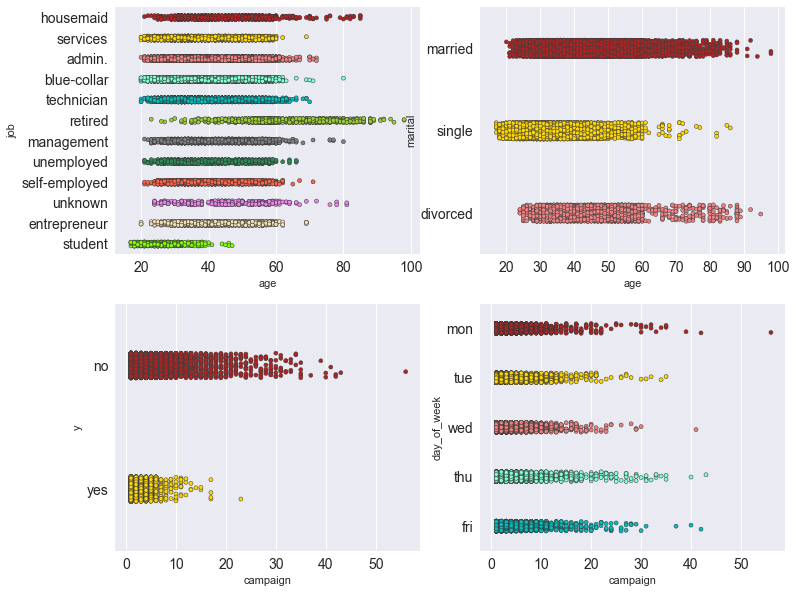

In [56]:
plt.figure(figsize=(12,10))
colors = ['firebrick', 'gold', 'lightcoral', 'aquamarine', 'c', 'yellowgreen', 'grey',
          'seagreen', 'tomato', 'violet', 'wheat', 'chartreuse', 'lightskyblue', 'royalblue']
#___________________________________________________________________
ax=plt.subplot(221)
ax = sns.stripplot(y="job", x="age", size = 4, palette = colors,
                    data=df, linewidth = 0.5,  jitter=True)
plt.setp(ax.get_xticklabels(), fontsize=14)
plt.setp(ax.get_yticklabels(), fontsize=14)

#___________________________________________________________________
ax=plt.subplot(222)
ax = sns.stripplot(y="marital", x="age", size = 4, palette = colors,
                    data=df, linewidth = 0.5,  jitter=True)
plt.setp(ax.get_xticklabels(), fontsize=14)
plt.setp(ax.get_yticklabels(), fontsize=14)

#___________________________________________________________________
ax=plt.subplot(223)
ax = sns.stripplot(y="y", x="campaign", size = 4, palette = colors,
                    data=df, linewidth = 0.5,  jitter=True)
plt.setp(ax.get_xticklabels(), fontsize=14)
plt.setp(ax.get_yticklabels(), fontsize=14)

#___________________________________________________________________
ax=plt.subplot(224)
ax = sns.stripplot(y="day_of_week", x="campaign", size = 4, palette = colors,
                    data=df, linewidth = 0.5,  jitter=True)
plt.setp(ax.get_xticklabels(), fontsize=14)
plt.setp(ax.get_yticklabels(), fontsize=14)

### Pairplot to view correlation 

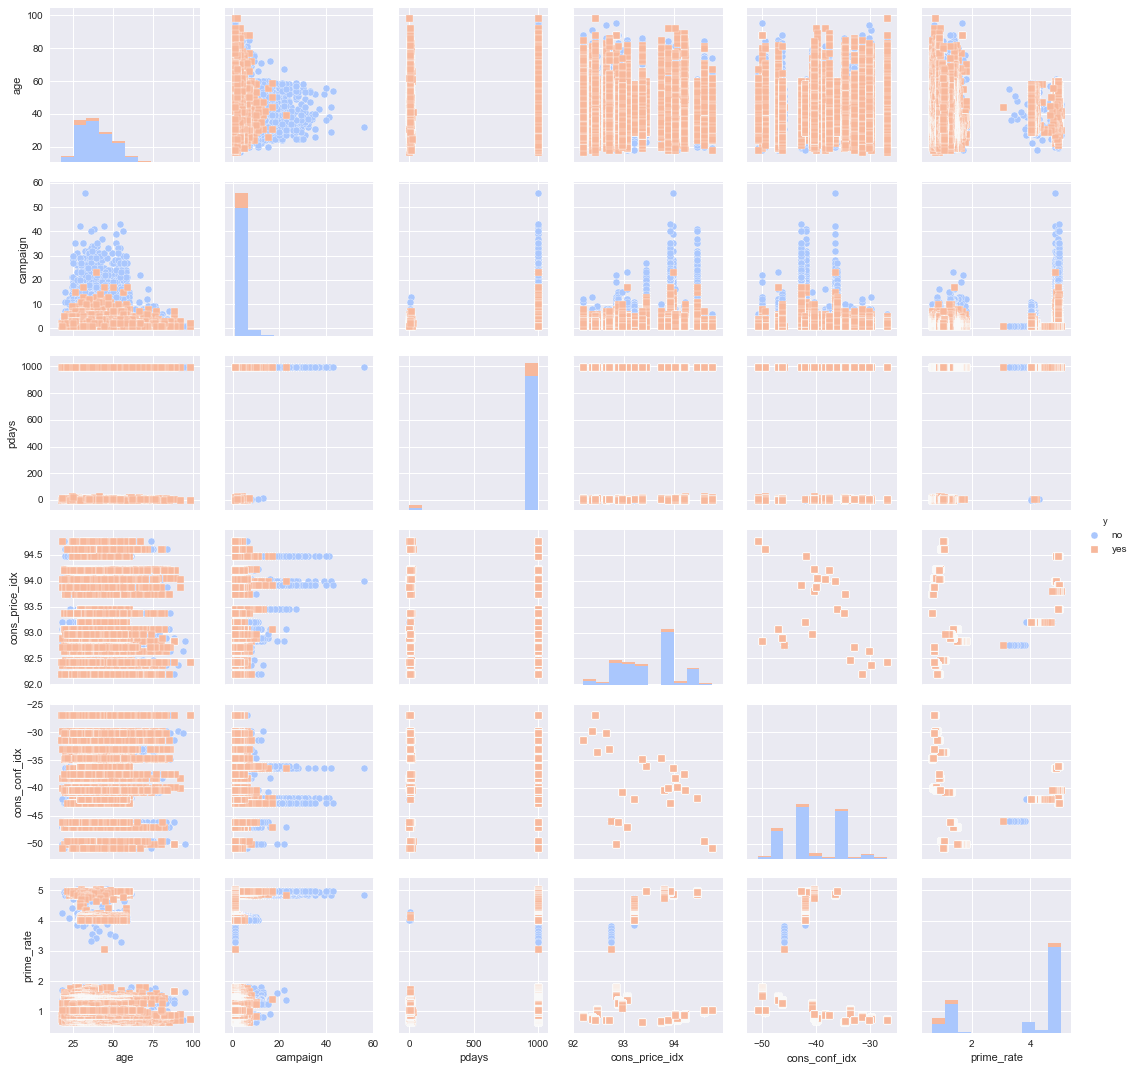

In [57]:
sns.pairplot(df,hue ='y', palette = 'coolwarm', markers=["o", "s"])

In [ ]:
#change pdays to dummy
#df.loc[df['pdays'] == 999, 'pdays_dummy'] = 0
#df.loc[df['pdays'] != 999, 'pdays_dummy'] = 1
#df = df.drop(['pdays'],axis=1)

# Modeling

### Option 1

In [58]:
# Random split the data into train and test by 70/30
from sklearn.model_selection import train_test_split
X=df1.drop('y',axis=1)
Y=df1['y']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.30,random_state=42)

### KNN choose the best K

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,Y_train)

from sklearn.metrics import classification_report, confusion_matrix
pred = knn.predict(X_test)
print (confusion_matrix(Y_test,pred))
print (classification_report(Y_test,pred))

error_rate = []
for i in range (1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,Y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != Y_test))
    
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='--',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs K')
plt.xlabel('K')
plt.ylabel('Error rate')

knn1 = KNeighborsClassifier(n_neighbors=19)
knn1.fit(X_train,Y_train)
pred = knn1.predict(X_test)
print (confusion_matrix(Y_test,pred))
print ('\n')
print (classification_report(Y_test,pred))

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.cross_validation import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import cross_val_score
from sklearn.grid_search import GridSearchCV



/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/anaconda/lib/python2.7/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [61]:
y = df1["y"].as_matrix()
X = df1.drop(["y"], axis = 1).as_matrix()

/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [65]:
def run_cv(X,y,clf_class,**kwargs):
    # Construct a kfolds object
    kf = KFold(len(y),n_folds=5,shuffle=True)
    y_pred = y.copy()
    clf = clf_class(**kwargs)
    # Iterate through folds
    for train_index, test_index in kf:
        #print("Train: ", train_index, "Test: ", test_index)
        X_train, X_test = X[train_index], X[test_index]
        y_train = y[train_index]
        
        clf.fit(X_train,y_train)
        y_pred[test_index] = clf.predict(X_test)
        ppp = clf.predict(future1)
    return y_pred

def accuracy(y_true,y_pred):
    return np.mean(y_true == y_pred) # NumPy interpretes True and False as 1. and 0.


LR_CV_result = run_cv(X,y,LogisticRegression) # L2 penalty is default
RF_CV_result = run_cv(X,y,RandomForestClassifier)
KNN_CV_result = run_cv(X,y,KNeighborsClassifier) # Default: n_neighbors=5
SVM_CV_result = run_cv(X,y,SGDClassifier)


print ("Logistic Regression: " + (str(accuracy(y, LR_CV_result))))
print ("Random forest: " + (str(accuracy(y, RF_CV_result))))
print ("K-nearest-neighbors: " + (str(accuracy(y, KNN_CV_result))))
print ("SVM: " + (str(accuracy(y, SVM_CV_result))))


Logistic Regression: 0.907443816729
Random forest: 0.899654065354
K-nearest-neighbors: 0.900176700431
SVM: 0.905577262885


### Fit df1 into future data to predict

In [46]:
def run_cv(X,y,clf_class,**kwargs):
    # Construct a kfolds object
    kf = KFold(len(y),n_folds=5,shuffle=True)
    y_pred = y.copy()
    clf = clf_class(**kwargs)
    # Iterate through folds
    for train_index, test_index in kf:
        #print("Train: ", train_index, "Test: ", test_index)
        X_train, X_test = X[train_index], X[test_index]
        y_train = y[train_index]
        
        clf.fit(X_train,y_train)
        y_pred[test_index] = clf.predict(X_test)
        ppp = clf.predict(future1)
    return ppp

LR_FUTURE_result = run_cv(X,y,LogisticRegression) # L2 penalty is default
RF_FUTURE_result = run_cv(X,y,RandomForestClassifier)
KNN_FUTURE_result = run_cv(X,y,KNeighborsClassifier) # Default: n_neighbors=5
SVM_FUTURE_result = run_cv(X,y,SGDClassifier)

In [47]:
LR_FUTURE_result.tolist()

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

### ConfusionMatrix


Random_Forest CM: 
[[35087   978]
 [ 3165   951]]
KNN CM: 
[[35152   913]
 [ 3108  1008]]
Logistic_Regression CM: 
[[35673   392]
 [ 3331   785]]
SVM CM: 
[[35534   531]
 [ 3259   857]]
Random Forest
Accuracy is 0.896891565665
Precision is 0.972882295855
Recall is 0.917259228276


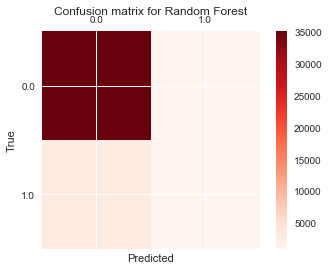

K-Nearest-Neighbors
Accuracy is 0.899927826585
Precision is 0.974684597255
Recall is 0.918766335599


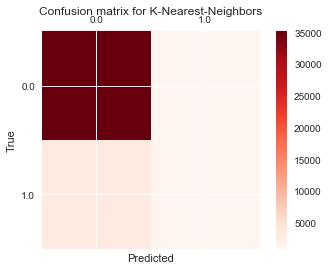

Logisitic Regression
Accuracy is 0.907344267191
Precision is 0.989130736171
Recall is 0.914598502718


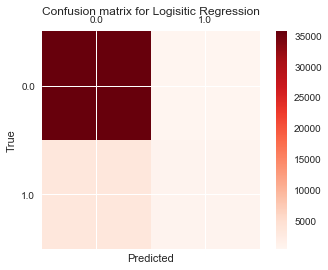

SVM
Accuracy is 0.905676812424
Precision is 0.985276583946
Recall is 0.915989998196


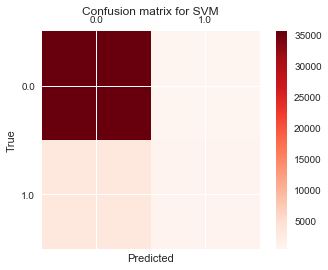

In [48]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

def cal_evaluation(classifier, cm):
    tp = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    tn = cm[1][1]
    accuracy  = (tp + tn) / (tp + fp + fn + tn + 0.0)
    precision = tp / (tp + fp + 0.0)
    recall = tp / (tp + fn + 0.0)
    print (classifier)
    print ("Accuracy is " + str(accuracy))
    print ("Precision is " + str(precision))
    print ("Recall is " + str(recall))

def draw_confusion_matrices(confusion_matricies,class_names):
    class_names = class_names.tolist()
    for cm in confusion_matrices:
        classifier, cm = cm[0], cm[1]
        cal_evaluation(classifier, cm)
        fig = plt.figure()
        ax = fig.add_subplot(111)
        cax = ax.matshow(cm, interpolation='nearest',cmap=plt.get_cmap('Reds'))
        plt.title('Confusion matrix for %s' % classifier)
        fig.colorbar(cax)
        ax.set_xticklabels([''] + class_names)
        ax.set_yticklabels([''] + class_names)
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()
    
y = np.array(y)
class_names = np.unique(y)

print 'Random_Forest CM: ' 
print confusion_matrix(y,RF_CV_result)
print 'KNN CM: ' 
print confusion_matrix(y,KNN_CV_result)
print 'Logistic_Regression CM: ' 
print confusion_matrix(y,LR_CV_result)
print 'SVM CM: ' 
print confusion_matrix(y,SVM_CV_result)

confusion_matrices = [
    ("Random Forest", confusion_matrix(y,RF_CV_result)),
    ("K-Nearest-Neighbors", confusion_matrix(y,KNN_CV_result)),
    ("Logisitic Regression", confusion_matrix(y,LR_CV_result)),
    ("SVM", confusion_matrix(y,SVM_CV_result))

]

%matplotlib inline
draw_confusion_matrices(confusion_matrices,class_names)

### Option 2

In [49]:
y = df_dummy["if_subscribe"].as_matrix()
X = df_dummy.drop(["if_subscribe"], axis = 1).as_matrix()

/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [50]:
def run_cv1(X,y,clf_class,**kwargs):
    # Construct a kfolds object
    kf = KFold(len(y),n_folds=5,shuffle=True)
    y_pred = y.copy()
    clf = clf_class(**kwargs)
    # Iterate through folds
    for train_index, test_index in kf:
        #print("Train: ", train_index, "Test: ", test_index)
        X_train, X_test = X[train_index], X[test_index]
        y_train = y[train_index]
        
        clf.fit(X_train,y_train)
        y_pred[test_index] = clf.predict(X_test)
    return y_pred
def accuracy(y_true,y_pred):
    return np.mean(y_true == y_pred) # NumPy interpretes True and False as 1. and 0.

LR_CV_result = run_cv1(X,y,LogisticRegression) # L2 penalty is default
RF_CV_result = run_cv1(X,y,RandomForestClassifier)
KNN_CV_result = run_cv1(X,y,KNeighborsClassifier) # Default: n_neighbors=5
SVM_CV_result = run_cv1(X,y,SGDClassifier)


print ("Logistic Regression: " + (str(accuracy(y, LR_CV_result))))
print ("Random forest: " + (str(accuracy(y, RF_CV_result))))
print ("K-nearest-neighbors: " + (str(accuracy(y, KNN_CV_result))))
print ("SVM: " + (str(accuracy(y, SVM_CV_result))))



Logistic Regression: 0.908016226575
Random forest: 0.897314651203
K-nearest-neighbors: 0.899006993355
SVM: 0.902690326274


### fit future_dummy into models

In [54]:
def run_cv1(X,y,clf_class,**kwargs):
    # Construct a kfolds object
    kf = KFold(len(y),n_folds=5,shuffle=True)
    y_pred = y.copy()
    clf = clf_class(**kwargs)
    # Iterate through folds
    for train_index, test_index in kf:
        #print("Train: ", train_index, "Test: ", test_index)
        X_train, X_test = X[train_index], X[test_index]
        y_train = y[train_index]
        
        clf.fit(X_train,y_train)
        y_pred[test_index] = clf.predict(X_test)
        ppp = clf.predict(future_dummy)
    return ppp

LR_FUTURE_result = run_cv1(X,y,LogisticRegression) # L2 penalty is default
RF_FUTURE_result = run_cv1(X,y,RandomForestClassifier)
KNN_FUTURE_result = run_cv1(X,y,KNeighborsClassifier) # Default: n_neighbors=5
SVM_FUTURE_result = run_cv1(X,y,SGDClassifier)

print LR_FUTURE_result

[ 0.  0.  0. ...,  1.  0.  0.]


### ConfusionMatrix

Random_Forest CM: 
[[35085   980]
 [ 3146   970]]
KNN CM: 
[[35328   737]
 [ 3321   795]]
Logistic_Regression CM: 
[[35663   402]
 [ 3294   822]]
SVM CM: 
[[35257   808]
 [ 3102  1014]]
Random Forest
Accuracy is 0.897314651203
Precision is 0.972826840427
Recall is 0.917710758285


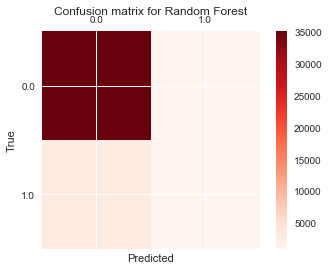

K-Nearest-Neighbors
Accuracy is 0.899006993355
Precision is 0.979564674893
Recall is 0.914072809128


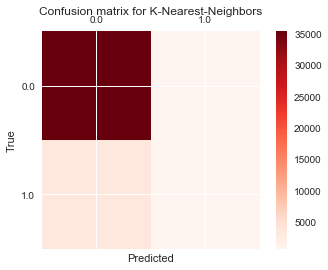

Logisitic Regression
Accuracy is 0.908016226575
Precision is 0.988853459032
Recall is 0.915445234489


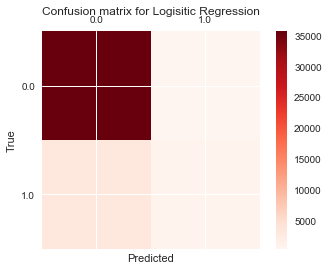

SVM
Accuracy is 0.902690326274
Precision is 0.977596007209
Recall is 0.919132406997


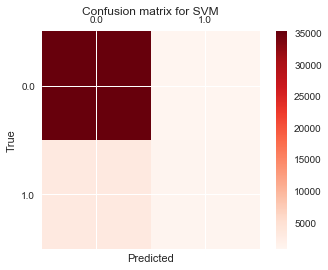

In [55]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

def cal_evaluation(classifier, cm):
    tp = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    tn = cm[1][1]
    accuracy  = (tp + tn) / (tp + fp + fn + tn + 0.0)
    precision = tp / (tp + fp + 0.0)
    recall = tp / (tp + fn + 0.0)
    print classifier
    print "Accuracy is " + str(accuracy)
    print "Precision is " + str(precision)
    print "Recall is " + str(recall)

def draw_confusion_matrices(confusion_matricies,class_names):
    class_names = class_names.tolist()
    for cm in confusion_matrices:
        classifier, cm = cm[0], cm[1]
        cal_evaluation(classifier, cm)
        fig = plt.figure()
        ax = fig.add_subplot(111)
        cax = ax.matshow(cm, interpolation='nearest',cmap=plt.get_cmap('Reds'))
        plt.title('Confusion matrix for %s' % classifier)
        fig.colorbar(cax)
        ax.set_xticklabels([''] + class_names)
        ax.set_yticklabels([''] + class_names)
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()
    
y = np.array(y)
class_names = np.unique(y)

confusion_matrices = [
    ("Random Forest", confusion_matrix(y,RF_CV_result)),
    ("K-Nearest-Neighbors", confusion_matrix(y,KNN_CV_result)),
    ("Logisitic Regression", confusion_matrix(y,LR_CV_result)),
    ("SVM", confusion_matrix(y,SVM_CV_result))

]

print 'Random_Forest CM: ' 
print confusion_matrix(y,RF_CV_result)
print 'KNN CM: ' 
print confusion_matrix(y,KNN_CV_result)
print 'Logistic_Regression CM: ' 
print confusion_matrix(y,LR_CV_result)
print 'SVM CM: ' 
print confusion_matrix(y,SVM_CV_result)


%matplotlib inline
draw_confusion_matrices(confusion_matrices,class_names)